## Final Project

In [1]:
import pymongo  # connecting to mongo db
import pandas as pd  # using pandas dataframe
import pprint
import re
import matplotlib.pyplot as plt  # for plotting
from pymongo import MongoClient
import numpy as np
import math
from sklearn.decomposition import PCA
import seaborn as sns
#import keras
%matplotlib inline

C:\Users\Amirtha\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [2]:
client = MongoClient('localhost', 27017)

In [3]:
db = client['movies']
collection = db['tmdb_5000_movies']
doc_iterator=collection.find()

In [4]:
doc_iterator.count()

C:\Users\Amirtha\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  if __name__ == '__main__':


4803

In [5]:
for doc in collection.find().limit(1):
    pprint.pprint(doc)

{'_id': ObjectId('5d2fd067d030aa0676b2cec7'),
 'budget': 237000000,
 'genres': '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, '
           '{"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science '
           'Fiction"}]',
 'homepage': 'http://www.avatarmovie.com/',
 'id': 19995,
 'keywords': '[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": '
             '"future"}, {"id": 3386, "name": "space war"}, {"id": 3388, '
             '"name": "space colony"}, {"id": 3679, "name": "society"}, {"id": '
             '3801, "name": "space travel"}, {"id": 9685, "name": '
             '"futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, '
             '"name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, '
             '"name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": '
             '10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": '
             '13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, '
     

### Exploratory data analysis

In [74]:
db = client.movies
collection = db.tmdb_5000_movies
org_df = pd.DataFrame(list(collection.find()))
df=org_df
df.head()

,_id,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,5d2fd067d030aa0676b2cec7,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,5d2fd067d030aa0676b2cec8,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,5d2fd067d030aa0676b2cec9,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,5d2fd067d030aa0676b2ceca,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,5d2fd067d030aa0676b2cecb,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


#### Data Cleansing

In [75]:
df["year"] = df["release_date"].str.split('-').str[0]

In [76]:
label = []
for i in df["vote_average"]:
    j=round(int(i),0)
    label.append(j)
df["label"]= label    

In [77]:
df.drop(["_id","homepage","overview","tagline"],axis=1,inplace=True)

In [163]:
df.head()

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,...,runtime,spoken_languages,status,title,vote_average,vote_count,year,label,prod_country,genre
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,...,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,2009,7,US,Action
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,...,169,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,2007,6,US,Adventure
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,...,148,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,2015,6,GB,Action
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,...,165,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,2012,7,US,Action
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,...,132,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,2012,6,US,Action


In [173]:
df.dtypes

budget                           int64
genres                          object
id                               int64
keywords                        object
original_language               object
original_title                  object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                         object
spoken_languages                object
status                          object
title                           object
vote_average                   float64
vote_count                       int64
year                           float64
label                            int64
prod_country                    object
genre                           object
dtype: object

In [207]:
df.shape

(4803, 22)

In [192]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['year']= pd.to_numeric(df['year'])
df['runtime']= pd.to_numeric(df['runtime'])

In [120]:
 df["prod_country"] =df["production_countries"].str.split('"').str[3]

In [162]:
 df["genre"] =df["genres"].str.split('"').str[5]

In [10]:
df.isnull().any()

_id                     False
budget                  False
genres                  False
homepage                False
id                      False
keywords                False
original_language       False
original_title          False
overview                False
popularity              False
production_companies    False
production_countries    False
release_date            False
revenue                 False
runtime                 False
spoken_languages        False
status                  False
tagline                 False
title                   False
vote_average            False
vote_count              False
year                    False
label                   False
dtype: bool

In [185]:
df.describe()

,budget,id,popularity,revenue,vote_average,vote_count,year,label,profit_loss
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4803.000000,4803.000000,4802.000000,4803.000000,4.803000e+03
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,6.092172,690.217989,2002.468763,5.652925,5.321560e+07
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,1.194612,1234.585891,12.414354,1.200481,1.359677e+08
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,1916.000000,0.000000,-1.657101e+08
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,5.600000,54.000000,1999.000000,5.000000,-7.995375e+05
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,6.200000,235.000000,2005.000000,6.000000,2.511317e+06
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,6.800000,737.000000,2011.000000,6.000000,5.531286e+07
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,10.000000,13752.000000,2017.000000,10.000000,2.550965e+09


In [190]:
df[df['budget']==0]

(1037, 22)

In [174]:
rows, col = df.shape
print('There are now {} columns and {} entries of movie data'.format(col, rows-1))

There are now 21 columns and 4802 entries of movie data


In [12]:
df.columns

Index(['_id', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'year', 'label'],
      dtype='object')

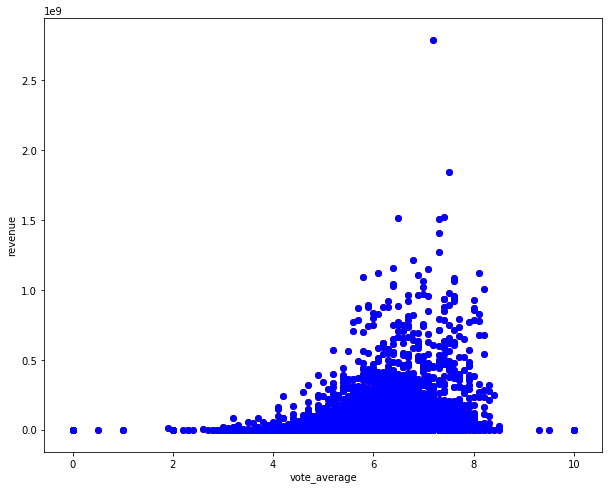

In [13]:
# Plotting scatterplot
plt.figure(figsize=(10,8))
plt.scatter(x=df.vote_average,y = df.revenue,c="red")
plt.scatter(x=df.vote_average,y = df.revenue,c="blue")
plt.xlabel("vote_average")
plt.ylabel("revenue")
plt.show()

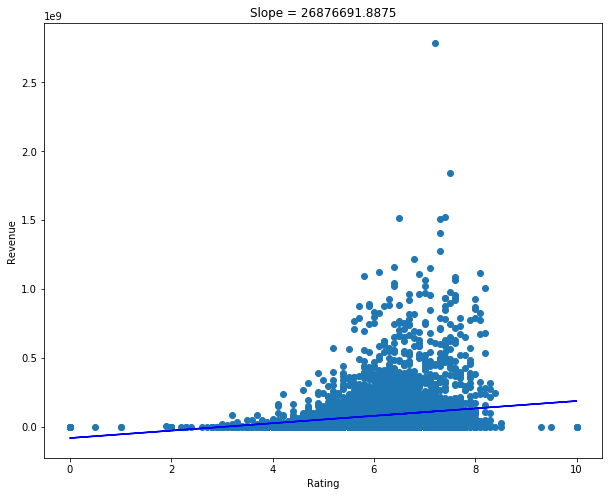

In [14]:
x = np.array(df.vote_average)
y = np.array(df.revenue)
# Deriving slope,intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]
#Plotting the figure
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Rating")
plt.ylabel("Revenue")
plt.show()

#### histograms

C:\Users\Amirtha\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


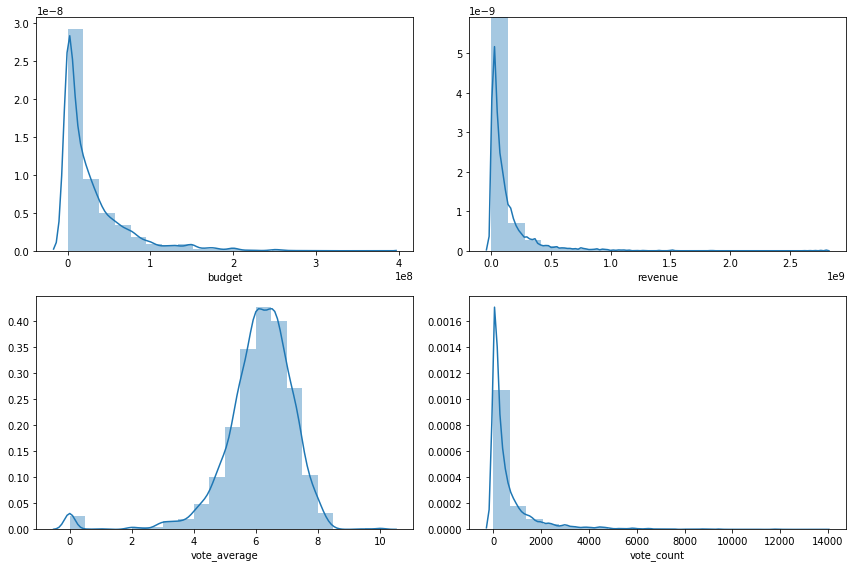

In [15]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(12, 8)

m1 = sns.distplot(df.budget, bins=20, ax=axes[0, 0])
m2 = sns.distplot(df.revenue, bins=20, ax=axes[0, 1])
m3 = sns.distplot(df.vote_average, bins=20, ax=axes[1, 0])
m4 = sns.distplot(df.vote_count, bins=20, ax=axes[1, 1])

#plt.setp(axes, yticks=[])
plt.tight_layout()

#### Language breakdown

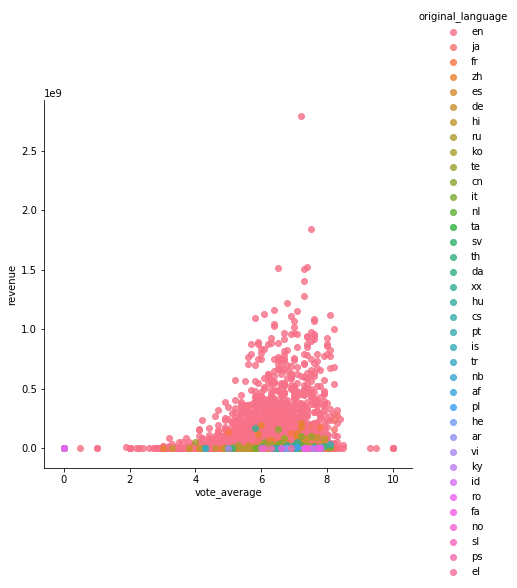

In [16]:
vis1 = sns.lmplot(data=df, x='vote_average', y='revenue', \
                 fit_reg=False, hue='original_language', height=6, aspect=1)

In [175]:
df['profit_loss']= df['revenue'] - df['budget']

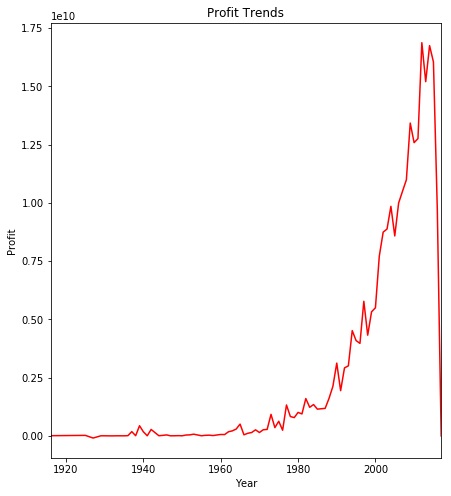

In [205]:
df.groupby('year')['profit_loss'].sum().plot(kind = 'line', figsize = (7, 8), color = 'r')
plt.title('Profit Trends')
plt.xlabel('Year')
plt.ylabel('Profit');

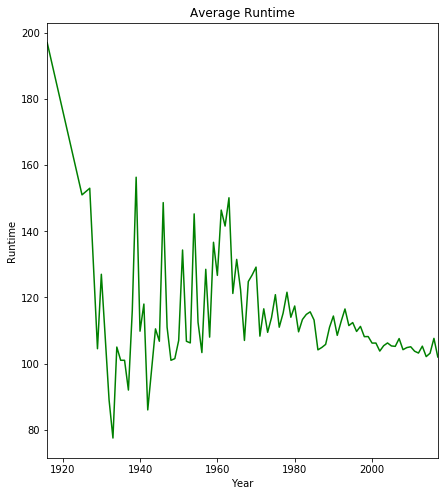

In [202]:
df.groupby('year')['runtime'].mean().plot('line',figsize = (7, 8), color = 'g')
plt.title('Average Runtime')
plt.xlabel('Year')
plt.ylabel('Runtime');

# breaking down the top 100 movies by genre

In [17]:
#breaking out the top 100 by revenue and removing the columns not needed
df1 = df.sort_values('revenue',ascending = False).head(100)

df2=df1.drop(['homepage','keywords','overview','production_companies','production_countries','spoken_languages','tagline','status'], axis=1)


In [18]:
#cleaning the genre category column so that we can deal with it: removing multiples and cleansing the data
df2['genre'] = df2['genres'].str.split(',').str[1]
df2['genre1'] = df2['genre'].str.split(':').str[1]
df2['genrec'] = df2['genre1'].str.strip('}}]"')
df2['genrec'] = df2['genrec'].str[2:]
#print(df2['genrec'])
df2=df2.drop(['genres','genre','genre1'], axis=1)
df2.head(5)

,_id,budget,id,original_language,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count,year,label,genrec
0,5d2fd067d030aa0676b2cec7,237000000,19995,en,Avatar,150.437577,2009-12-10,2787965087,162,Avatar,7.2,11800,2009,7,Action
25,5d2fd067d030aa0676b2cee0,200000000,597,en,Titanic,100.025899,1997-11-18,1845034188,194,Titanic,7.5,7562,1997,7,Drama
16,5d2fd067d030aa0676b2ced7,220000000,24428,en,The Avengers,144.448633,2012-04-25,1519557910,143,The Avengers,7.4,11776,2012,7,Science Fiction
46,5d2fd067d030aa0676b2cef5,150000000,135397,en,Jurassic World,418.708552,2015-06-09,1513528810,124,Jurassic World,6.5,8662,2015,6,Action
41,5d2fd067d030aa0676b2cef0,190000000,168259,en,Furious 7,102.322217,2015-04-01,1506249360,137,Furious 7,7.3,4176,2015,7,Action


# How genre's fair in the revenue top 100

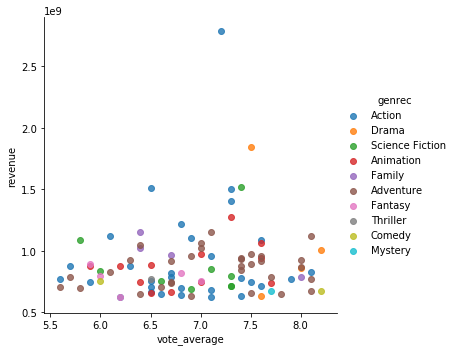

In [19]:
vis1 = sns.lmplot(data=df2, x='vote_average', y='revenue', \
                 fit_reg=False, hue='genrec')

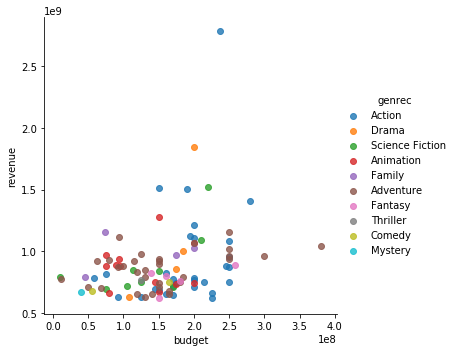

In [20]:
vis1 = sns.lmplot(data=df2, x='budget', y='revenue', \
                 fit_reg=False, hue='genrec')

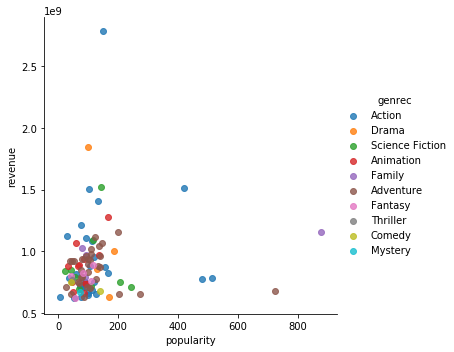

In [21]:
vis1 = sns.lmplot(data=df2, x='popularity', y='revenue', \
                 fit_reg=False, hue='genrec')

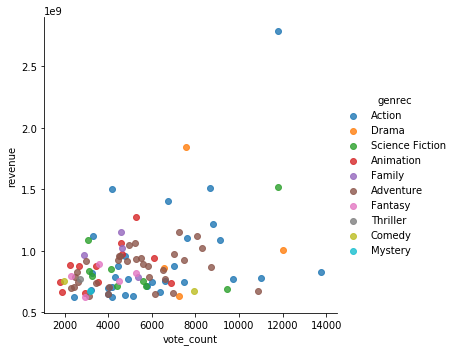

In [22]:
vis1 = sns.lmplot(data=df2, x='vote_count', y='revenue', \
                 fit_reg=False, hue='genrec')

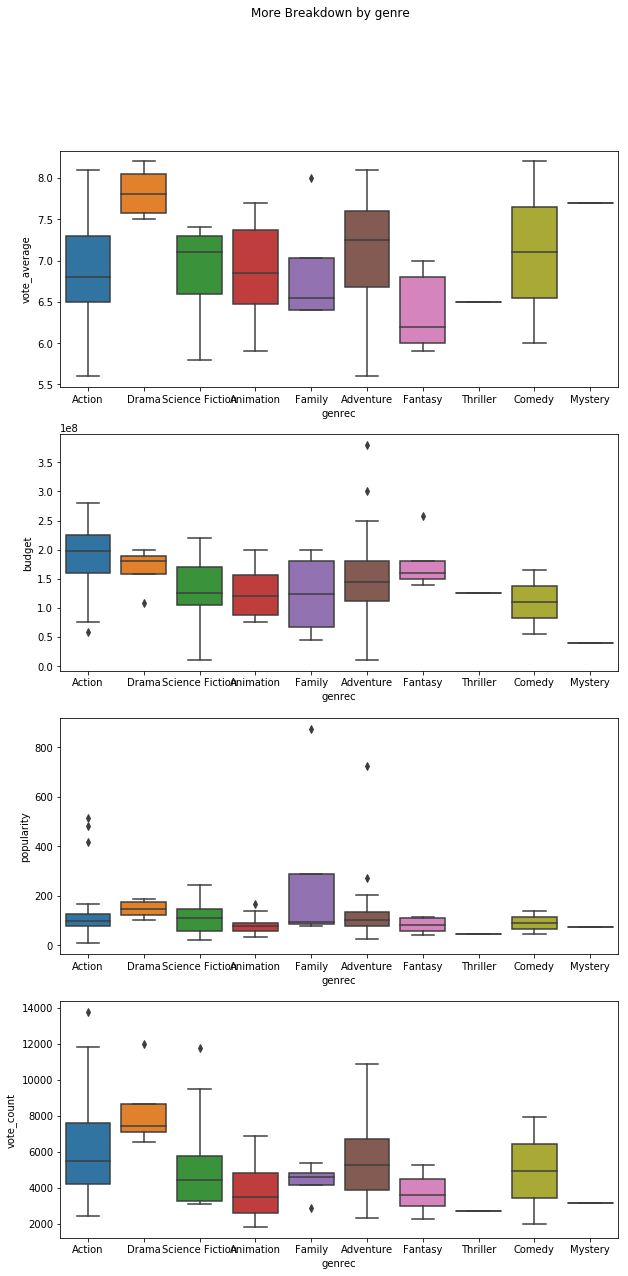

In [23]:
fig, axes = plt.subplots(4, 1)
fig.set_size_inches(10, 20)

sns.boxplot(data=df2, x='genrec', y='vote_average', ax=axes[0])
sns.boxplot(data=df2, x='genrec', y='budget', ax=axes[1])
sns.boxplot(data=df2, x='genrec', y='popularity', ax=axes[2])
sns.boxplot(data=df2, x='genrec', y='vote_count', ax=axes[3])

plt.suptitle('More Breakdown by genre')
plt.show()

In [24]:
print(np.corrcoef(x,y))


[[ 1.          0.19714967]
 [ 0.19714967  1.        ]]


### Linear Regression

In [25]:
from sklearn import linear_model as lm 

In [26]:
#creating linear object
linear_reg = lm.LinearRegression()

In [27]:
indep_vars = df.loc[:,['budget','popularity']]

dep_var = df[["revenue"]]

In [28]:
linear_reg.fit(indep_vars , dep_var)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
print(linear_reg.coef_,linear_reg.intercept_)

[[  2.17519964e+00   1.89298897e+06]] [-21602809.61039671]


In [30]:
print("Revenue = ",round(linear_reg.coef_[0][0],4),"* budget+ ",
      round(linear_reg.coef_[0][1],4),"* popularity ",
      round(linear_reg.intercept_[0],4))

Revenue =  2.1752 * budget+  1892988.9692 * popularity  -21602809.6104


#### Analysis

1. Intercept -21602809.6104 indicates y intercent value when all other variables are zero
2. Co-efficient esimate budget 2.1752 indicates, while keeping all other variables constant a unit increase in budget will increase Revenue by  2.1752
3. co-efficient estimate popularity 1892988.9692 indictates, while keeping all other variables constant a unit increase in popularity will increase revenue by 1892988.9692


### Naïve Bayes implementation

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [32]:
dataTrain, dataTest, labelTrain, labelTest = train_test_split( df.loc[:,["budget","popularity","revenue"]], df.loc[:,"label"], test_size=0.33, random_state=42)

In [33]:
naive_bayes = GaussianNB()

In [34]:
nb_model = naive_bayes.fit(dataTrain,labelTrain)

In [35]:
predict_test_label =  nb_model.predict(dataTest)

In [36]:
print("Test Accuracy:",100*sum(predict_test_label == labelTest)/len(predict_test_label),"%")

Test Accuracy: 21.8296529968 %


#### Cross validation hold out method

In [37]:
r,c = df.shape

In [38]:
size =  math.floor(2*r/3)

In [39]:
df = df.sample(frac=1)

In [40]:
train_data = df.iloc[:size,:]
test_data = df.iloc[size:,:]

In [41]:
train_features = train_data.loc[:,["budget","popularity","revenue"]]
train_label = train_data.loc[:,"label"]
test_features = test_data.loc[:,["budget","popularity","revenue"]]
Test_label = test_data.loc[:,"label"]

In [42]:
model = naive_bayes.fit(train_features,train_label)

In [43]:
pred_test_label =  model.predict(test_features)

In [44]:
print("Test Accuracy:",100*sum(pred_test_label == Test_label)/len(pred_test_label),"%")

Test Accuracy: 24.4222361024 %


#### Conclusion

Naive bayes works only with two labels however data set has more labels hence accuracy is very low

### Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [46]:
df
print(df.columns)

Index(['_id', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'year', 'label'],
      dtype='object')


In [47]:
label = df[['vote_average']]
data = df['original_title']

In [48]:
#print(label)

In [49]:
#Transforming the data
data1 = []
label1 = []

data1 = pd.get_dummies(data)

for i in label.values:
    label1.append(round(int(i)))
    
label1 = pd.DataFrame(label1, columns = ['labels'])

In [50]:
print(label1.head(5))

   labels
0       7
1       6
2       7
3       6
4       6


In [51]:
print(data1.head(5))

      9  21  42  54  300  1408  1776  1941  1982  2012 ...   곡성  괴물  디워  실미도  \
3365  0   0   0   0    0     0     0     0     0     0 ...    0   0   0    0   
119   0   0   0   0    0     0     0     0     0     0 ...    0   0   0    0   
1724  0   0   0   0    0     0     0     0     0     0 ...    0   0   0    0   
1403  0   0   0   0    0     0     0     0     0     0 ...    0   0   0    0   
747   0   0   0   0    0     0     0     0     0     0 ...    0   0   0    0   

      올드보이  인천상륙작전  좋은 놈, 나쁜 놈, 이상한 놈  친절한 금자씨  태극기 휘날리며  해운대  
3365     0       0                  0        0         0    0  
119      0       0                  0        0         0    0  
1724     0       0                  0        0         0    0  
1403     0       0                  0        0         0    0  
747      0       0                  0        0         0    0  

[5 rows x 4801 columns]


In [52]:
#Creating a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=50)
clf.fit(data1, label1.values.ravel())

cv = cross_val_score(clf, data1, label1, cv = 5)
accuracy = np.mean(cv)

NameError: name 'cross_val_score' is not defined

In [ ]:
accuracy

#### Conclusion

#### Un Supervised learning

In [53]:
from sklearn.cluster import KMeans

#### Elbow point method findng optimum no of clusters


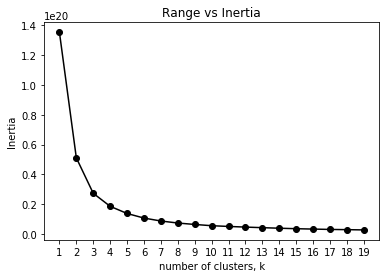

In [54]:
# make a range from 1 to 20
ks = range(1, 20)
inertias = [] # empty list

# for loop to calucate Kmeans for each value
for k in ks:
    model =KMeans(n_clusters=k) 
    model.fit(df.loc[:,["budget","popularity","revenue"]])    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot Range vs Inertias
plt.plot(ks, inertias, '-o',c="black")
plt.xlabel('number of clusters, k')
plt.ylabel('Inertia')
plt.title('Range vs Inertia')
plt.xticks(ks)
plt.show()

In [55]:
df2.label.unique()

array([7, 6, 8, 5], dtype=int64)

In [56]:
# run KMeans on df (with n_clusters=3)
model = KMeans(n_clusters=4)
# fit kmeans object to data buddymove_df column sports to picnic
model.fit(df.loc[:,["budget","popularity","revenue"]])  
labels =  model.predict(df.loc[:,["budget","popularity","revenue"]])  

In [57]:
centroids = model.cluster_centers_
print(centroids)

[[  1.37801389e+07   1.20438328e+01   1.66395239e+07]
 [  1.02040877e+08   6.28083953e+01   4.14460206e+08]
 [  1.60863095e+08   1.27456421e+02   9.35473906e+08]
 [  5.30864405e+07   3.53351974e+01   1.53431216e+08]]


In [58]:
#dimension reduction for plotting the clusters
pca = PCA(n_components=2).fit(df.loc[:,["budget","popularity","revenue"]])
pca_2d = pca.transform(df.loc[:,["budget","popularity","revenue"]])
pca_cen = PCA(n_components=2).fit(centroids)
pca_2d_cen = pca.transform(centroids)

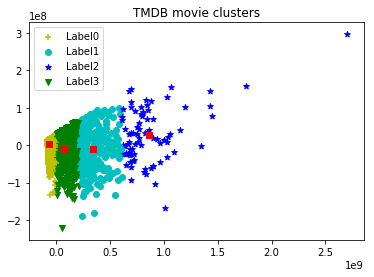

In [59]:
for i in range(0, pca_2d.shape[0]):
    if labels[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='y', marker='+')
   
    elif labels[i] == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='c', marker='o')
  
    elif labels[i] == 2:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')

    elif labels[i] == 3:
        c4 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='v')

plt.legend([c1, c2, c3,c4], ['Label0', 'Label1','Label2','Label3'])
plt.title('TMDB movie clusters')
plt.scatter(pca_2d_cen[0,0],pca_2d_cen[0,1],c='r',marker="s")
plt.scatter(pca_2d_cen[1,0],pca_2d_cen[1,1],c='r',marker="s")
plt.scatter(pca_2d_cen[2,0],pca_2d_cen[2,1],c='r',marker="s")
plt.scatter(pca_2d_cen[3,0],pca_2d_cen[3,1],c='r',marker="s")
plt.show()